In [1]:
import numpy as np
from medmnist import PathMNIST
import tensorflow as tf
import seaborn as sns
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import random
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [2]:
datasetB_train = PathMNIST(split="train", download=True)
datasetB_Validation = PathMNIST(split="val", download=True)
datasetB_Test = PathMNIST(split="test", download=True)

Using downloaded and verified file: C:\Users\zhr\.medmnist\pathmnist.npz
Using downloaded and verified file: C:\Users\zhr\.medmnist\pathmnist.npz
Using downloaded and verified file: C:\Users\zhr\.medmnist\pathmnist.npz


In [3]:
train_images_xB = datasetB_train.imgs
train_labels_yB = datasetB_train.labels

valid_images_xB = datasetB_Validation.imgs
valid_labels_yB = datasetB_Validation.labels

test_images_xB = datasetB_Test.imgs
test_labels_yB = datasetB_Test.labels

image_width, image_height = 28, 28  
num_classes = 9

seed_value = 42
tf.random.set_seed(seed_value)
np.random.seed(seed_value)
random.seed(seed_value)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(image_width, image_height, 3)),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['acc'])

train_labels_yB_one_hot = to_categorical(train_labels_yB, num_classes)
valid_labels_yB_one_hot = to_categorical(valid_labels_yB, num_classes)
test_labels_yB_one_hot = to_categorical(test_labels_yB, num_classes)

history = model.fit(train_images_xB, train_labels_yB_one_hot, epochs=16, batch_size=64, validation_data=(valid_images_xB, valid_labels_yB_one_hot), shuffle=True)

Epoch 1/16
1407/1407 [==============================] - 159s 112ms/step - loss: 1.0580 - acc: 0.6106 - val_loss: 0.6501 - val_acc: 0.7523
Epoch 2/16
1407/1407 [==============================] - 156s 111ms/step - loss: 0.5595 - acc: 0.7981 - val_loss: 0.4501 - val_acc: 0.8415
Epoch 3/16
1407/1407 [==============================] - 157s 112ms/step - loss: 0.4159 - acc: 0.8512 - val_loss: 0.3273 - val_acc: 0.8881
Epoch 4/16
1407/1407 [==============================] - 160s 114ms/step - loss: 0.3482 - acc: 0.8771 - val_loss: 0.3055 - val_acc: 0.8936
Epoch 5/16
1407/1407 [==============================] - 162s 115ms/step - loss: 0.3030 - acc: 0.8930 - val_loss: 0.3445 - val_acc: 0.8776
Epoch 6/16
1407/1407 [==============================] - 162s 115ms/step - loss: 0.2739 - acc: 0.9038 - val_loss: 0.2873 - val_acc: 0.9025
Epoch 7/16
1407/1407 [==============================] - 169s 120ms/step - loss: 0.2494 - acc: 0.9128 - val_loss: 0.2676 - val_acc: 0.9081
Epoch 8/16
1407/1407 [============

In [4]:
test_loss, test_acc = model.evaluate(test_images_xB, test_labels_yB_one_hot, verbose=2)
print("Test accuracy for Task B:", test_acc)

225/225 - 3s - loss: 0.4543 - acc: 0.8852 - 3s/epoch - 12ms/step
Test accuracy for Task B: 0.8852367401123047


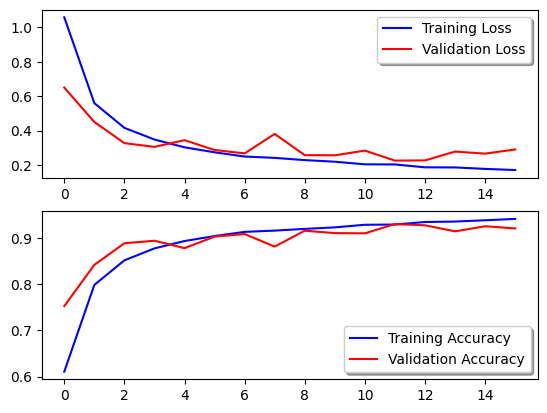

In [5]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

225/225 [==============================] - 3s 12ms/step


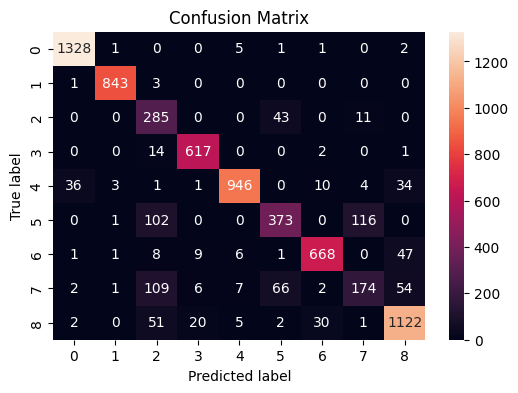

In [6]:
predictions = model.predict(test_images_xB)

predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels_yB_one_hot, axis=1)

conf_matrix = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

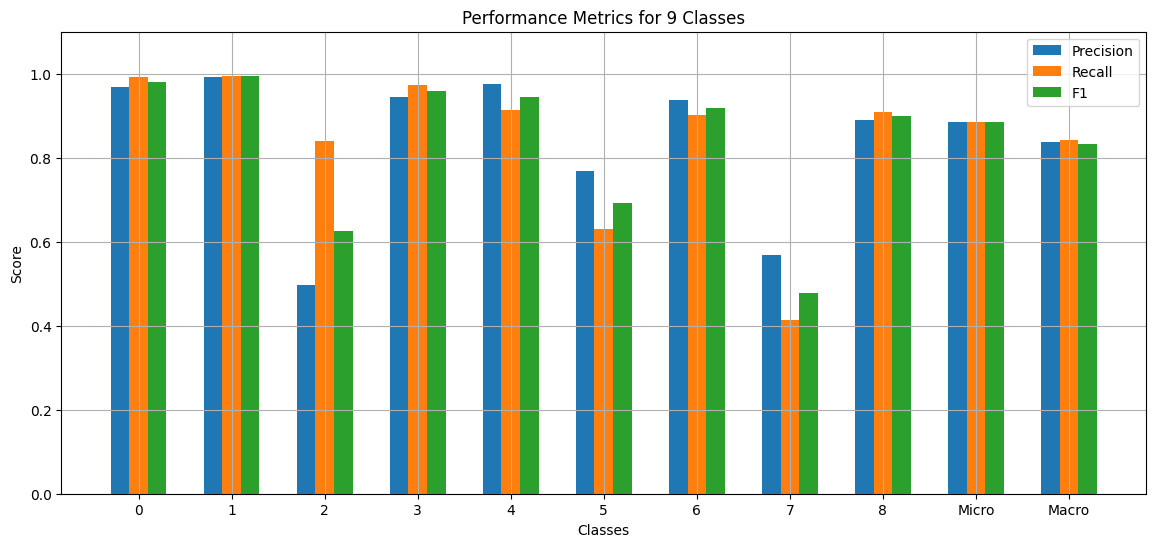

In [7]:
accuracy = accuracy_score(true_classes, predicted_classes)

precision = precision_score(true_classes, predicted_classes, average=None)
precision_micro = precision_score(true_classes, predicted_classes, average='micro')
precision_macro = precision_score(true_classes, predicted_classes, average='macro')

recall = recall_score(true_classes, predicted_classes, average=None)
recall_micro = recall_score(true_classes, predicted_classes, average='micro')
recall_macro = recall_score(true_classes, predicted_classes, average='macro')

f1 = f1_score(true_classes, predicted_classes, average=None)
f1_micro = f1_score(true_classes, predicted_classes, average='micro')
f1_macro= f1_score(true_classes, predicted_classes, average='macro')

precision = np.append(precision, [precision_micro, precision_macro])
recall = np.append(recall, [recall_micro, recall_macro])
f1 = np.append(f1, [f1_micro, f1_macro])
classes = list(range(num_classes)) + ['Micro', 'Macro']

x = np.arange(len(classes))
width = 0.2

fig1, ax1 = plt.subplots(figsize=(14, 6))
rects1 = ax1.bar(x - width, precision, width, label='Precision')
rects2 = ax1.bar(x, recall, width, label='Recall')
rects3 = ax1.bar(x + width, f1, width, label='F1')

ax1.set_xlabel('Classes')
ax1.set_ylabel('Score')
ax1.set_title('Performance Metrics for 9 Classes')
ax1.set_xticks(x)
ax1.set_xticklabels(classes)
ax1.set_ylim(0, 1.1)
ax1.legend(loc='upper right')
ax1.grid(True)

plt.show()